 Step 1: Install & Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


Step 2: Load Dataset

In [4]:
# Load mall customer dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 3: Explore and Clean Data

In [5]:
# Check for missing values
print(data.isnull().sum())

# Rename columns for convenience
data.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Step 4: Visualize the Data

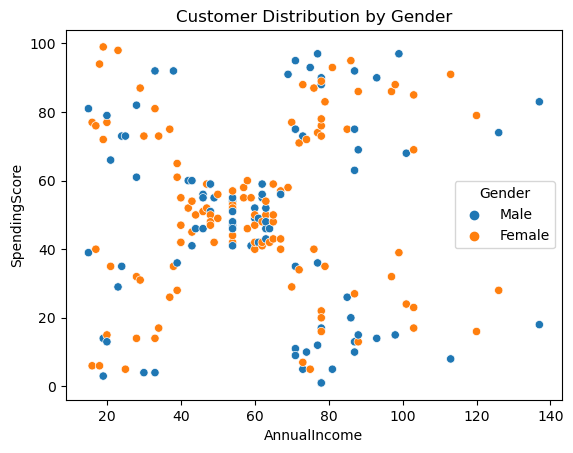

In [6]:
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=data, hue='Gender')
plt.title('Customer Distribution by Gender')
plt.show()


Step 5: Select Features and Normalize

In [7]:
X = data[['AnnualIncome', 'SpendingScore']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 6: Use Elbow Method to Find Optimal Clusters


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

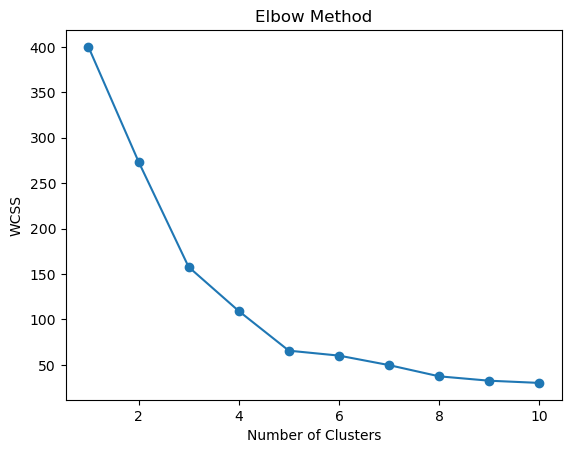

In [8]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Step 7: Apply KMeans Clustering

In [9]:
# Choose optimal k (e.g., 5 from elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 Step 8: Visualize Clusters

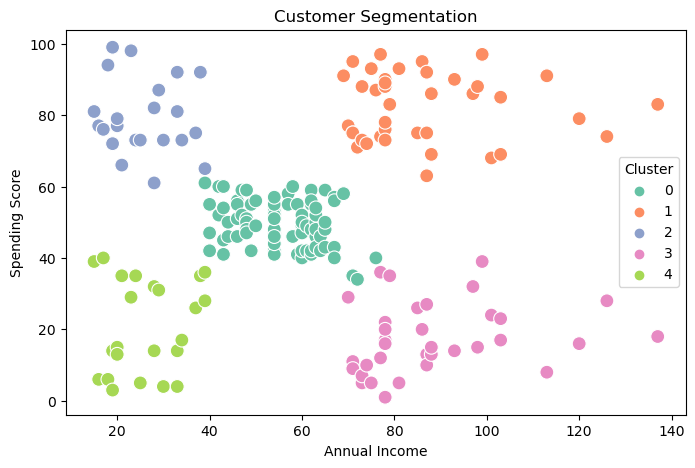

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Step 9: Analyze Segments

In [11]:
cluster_analysis = data.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean()
print(cluster_analysis)


               Age  AnnualIncome  SpendingScore
Cluster                                        
0        42.716049     55.296296      49.518519
1        32.692308     86.538462      82.128205
2        25.272727     25.727273      79.363636
3        41.114286     88.200000      17.114286
4        45.217391     26.304348      20.913043
